<div style='border:solid green 5px; padding: 40px'>

# <font color='darkgreen'>**Проект по построению модели для определения возраста покупателей по фото**</font>
    
</div>

_**Цель проекта: построить модель для определения приблизительного возраста человека с качеством MAE < 7.**_

**Описание проекта:**

_Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:_

_- анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;_

_- контролировать добросовестность кассиров при продаже алкоголя_

_В нашем распоряжении набор фотографий людей с указанием возраста._
_В статье о датасете, с которым мы работаем, значение **MAE** равно **5.4** — если удастся получить **MAE** меньше **7**, это будет отличный результат._ 

## Этап 1. Исследовательский анализ данных

In [1]:
# импортируем необходимые библиотеки и модули

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# загрузим данные

labels = pd.read_csv('/datasets/faces/labels.csv')

datagen = ImageDataGenerator(rescale=1./255)

datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
# посмотрим структуру датасета

labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# посмотрим основную информацию о датасете

labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# посмотрим основную информацию о датасете

labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


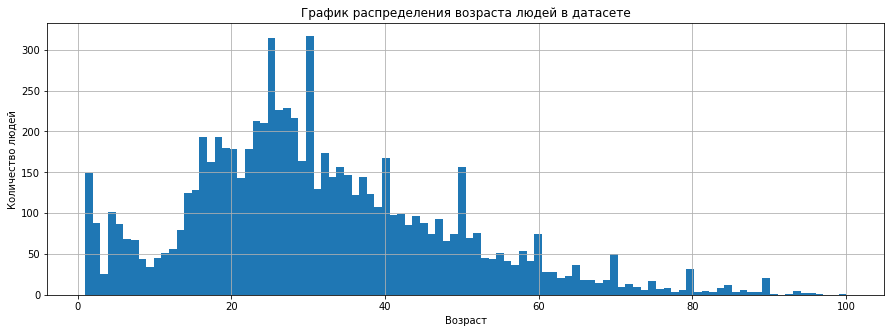

In [6]:
# посмотрим на графике распределение возраста людей в датасете

labels['real_age'].hist(bins=100, figsize=(15, 5))
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('График распределения возраста людей в датасете');

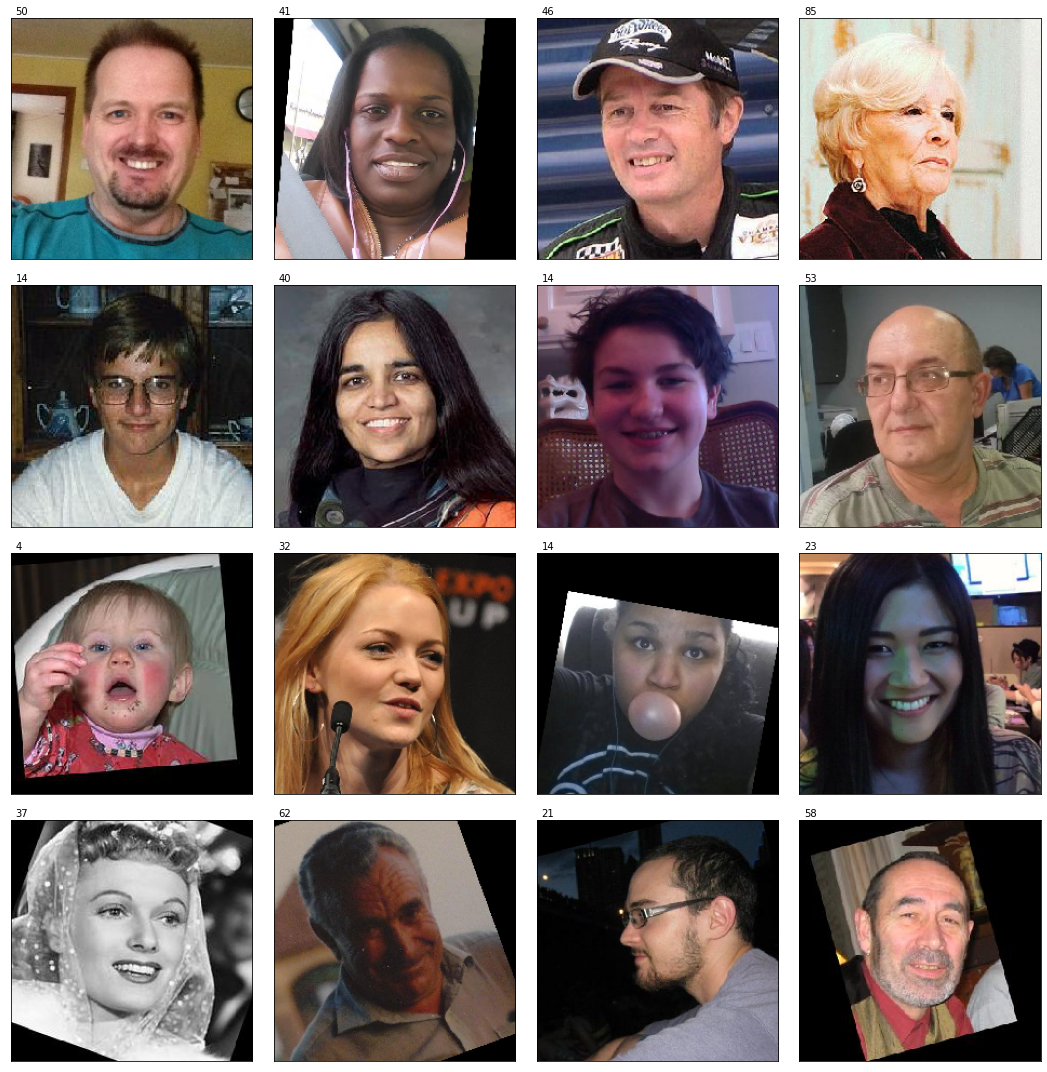

In [8]:
# посмотрим на 16 фотографий

features, target = next(datagen_flow)
fig = plt.figure(figsize=(15,15))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.text(4, -4, target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 1:**

В нашем распоряжении датасет с 7591 размеченной фотографией. Столбец **file_name** содержит фотографию. Столбец **real_age** - целевой признак - хранит в себе реальный возраст человека.
    
Основная доля людей в выборке возрастом от 18 до 40, медианный возраст - 29 лет, средний - 31. Есть некоторые пики на возрасте 26, 31, 40-41, 18-20, 51. Некоторые фото в плохом качестве или запечатлели лицо людей в движении. Это усложнит задачу обучения для модели, с другой стороны возможно повысит качество её обучения на таких разнообразных данных. Преобладание людей определенной возрастной группы в обучающей выборке хорошо натренирует модель на определение возраста людей именно этого возрастного диапазона.

</div>

## Этап 2. Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

Train for 178 steps, validate for 60 steps

Epoch 1/20
2023-04-13 12:16:17.244762: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-04-13 12:16:17.559178: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 68s - loss: 246.8019 - mae: 11.3203 - val_loss: 660.2589 - val_mae: 20.6938

Epoch 2/20
178/178 - 43s - loss: 73.8114 - mae: 6.5404 - val_loss: 676.3240 - val_mae: 20.9039

Epoch 3/20
178/178 - 42s - loss: 48.1868 - mae: 5.2431 - val_loss: 266.5798 - val_mae: 12.0332

Epoch 4/20
178/178 - 43s - loss: 37.5178 - mae: 4.6575 - val_loss: 114.2255 - val_mae: 8.1720

Epoch 5/20
178/178 - 42s - loss: 26.4711 - mae: 3.9239 - val_loss: 81.5090 - val_mae: 6.8812

Epoch 6/20
178/178 - 42s - loss: 21.6172 - mae: 3.5762 - val_loss: 66.3386 - val_mae: 6.1509

Epoch 7/20
178/178 - 42s - loss: 17.2302 - mae: 3.2150 - val_loss: 64.6795 - val_mae: 6.0053

Epoch 8/20
178/178 - 41s - loss: 14.7391 - mae: 2.9454 - val_loss: 86.4297 - val_mae: 6.9054

Epoch 9/20
178/178 - 39s - loss: 12.0692 - mae: 2.6301 - val_loss: 66.1728 - val_mae: 6.1902

Epoch 10/20
178/178 - 40s - loss: 10.7313 - mae: 2.4699 - val_loss: 70.9491 - val_mae: 6.2160

Epoch 11/20
178/178 - 39s - loss: 9.8870 - mae: 2.3554 - val_loss: 66.9266 - val_mae: 6.0508

Epoch 12/20
178/178 - 40s - loss: 8.9693 - mae: 2.2536 - val_loss: 81.2777 - val_mae: 6.5990

Epoch 13/20
178/178 - 40s - loss: 7.7633 - mae: 2.1052 - val_loss: 64.9062 - val_mae: 6.0752

Epoch 14/20
178/178 - 39s - loss: 7.1936 - mae: 2.0283 - val_loss: 61.4385 - val_mae: 5.7605

Epoch 15/20
Epoch 16/20
178/178 - 39s - loss: 7.2772 - mae: 2.0079 - val_loss: 65.0771 - val_mae: 6.1998
178/178 - 40s - loss: 6.7932 - mae: 1.9639 - val_loss: 57.7243 - val_mae: 5.6677

Epoch 17/20
178/178 - 40s - loss: 6.6658 - mae: 1.9359 - val_loss: 61.2014 - val_mae: 5.8133

Epoch 18/20
178/178 - 38s - loss: 6.0842 - mae: 1.8743 - val_loss: 65.6360 - val_mae: 6.0637

Epoch 19/20
178/178 - 37s - loss: 6.1956 - mae: 1.8917 - val_loss: 58.8231 - val_mae: 5.6264

Epoch 20/20
178/178 - 38s - loss: 6.6036 - mae: 1.9335 - val_loss: 59.4207 - val_mae: 5.6922
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']

60/60 - 9s - loss: 59.4207 - mae: 5.6922
Test MAE: 5.6922




<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 2:**

На этом этапе было написано 4 функции: для загрузки обучающей и тестовой выборок, функции для создания и запуска модели.
Модель успешно обучилась на датасете с фотографиями. Были получены удовлетворительные результаты метрики MAE = 5.6922

</div>

## Этап 3. Анализ обученной модели

<div style='border:solid green 5px; padding: 40px'>

**Вывод по Этапу 3:**

Для решения задачи по построению модели для определения возраста мы взяли предобученную на большом датасете ImageNet сеть ResNet50. Сеть ResNet50 представляет собой сложную многослойную структуру сетей, поборовшую проблему затухающего градиента в очень глубоких сетях. Сама по себе она дает очень хорошее качество обучения. 
    
В исследовательских целях мы оставили "костяк" сети и отдельно переписали два последних слоя: GlobalAveragePooling2D (англ. «глобальный двумерный пулинг усреднением») и Dense полносвязный слой с одним выходным нейроном. Ожидаемо сеть сразу же дала необходимое удовлетворительное значение метрики качества обучения MAE = 6.2967. 
    
Путем добавления аугментации и постепенного снижения скорости обучения удалось улучшить метрику до MAE = 5.6922
    
Также в датасете присутствуют фото маленьких детей (которые в нашем случае не являются покупателями магазина), лица в движении  или фото плохого качества. Если от них избавиться, думаю можно еще улучшить качество обучения модели.

</div>